In [2]:
df['Embeddings']

0       [0.229548112, 0.401379973, 0.709224641, -0.310...
1       [0.262241274, 0.416224033, 0.670677245, -0.301...
2       [0.262241274, 0.416224033, 0.670677245, -0.301...
3       [0.233746156, 0.41280815, 0.720358193, -0.3248...
4       [0.233746156, 0.41280815, 0.720358193, -0.3248...
                              ...                        
1073    [0.220761716, 0.411873817, 0.728400469, -0.310...
1074    [0.233884066, 0.419766098, 0.722747862, -0.319...
1075    [0.207574964, 0.384215593, 0.743888855, -0.324...
1076    [0.207574964, 0.384215593, 0.743888855, -0.324...
1077    [0.251417726, 0.434744626, 0.721360683, -0.324...
Name: Embeddings, Length: 1078, dtype: object

In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Load the Excel file into a DataFrame
file_path = 'unique_references.xlsx'
df = pd.read_excel(file_path)

# Specify the column containing the embeddings (replace 'Embeddings_Column' with the actual column name)
embeddings_column_name = 'Embeddings'


In [66]:
def parse_embeddings(embeddings_str):
    # Split the string by comma and remove any leading/trailing whitespace
    values = embeddings_str.strip('[]').split(',')
    # Convert the values to float and create a NumPy array
    return np.array([float(val) for val in values]).round(10)

df['Embeddings'] = df[embeddings_column_name].apply(parse_embeddings)

# Create a new DataFrame with the extracted embeddings as columns
embedding_df = pd.DataFrame(df['Embeddings'].tolist())


,Reference_Number
0,20221AGWA
1,FIN873DLGSCAG
2,02022021DLGSCPTT
3,RFQBPB202108
4,CRTF200001038
...,...
411,WAPOL05820
412,WAPOL15720
413,WAPOL13118A
414,WAPOL00119


Create a excel file with fewer values (such as ref_number , contract_title, Description , Cluster_grp)

Scale the data before appying DBSCAN 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(embedding_df)

In [49]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.10, min_samples=5)  # Adjust parameters as needed
#cluster_labels = dbscan.fit_predict(embedding_df)

# Add the cluster labels to the original DataFrame
df['Cluster_Label'] = cluster_labels

# Save the updated DataFrame to a new Excel file
#updated_file_path = 'updated_excel_file.xlsx'
#df.to_excel(updated_file_path, index=False)

# Print the cluster labels
#print("Cluster labels:")
#print(cluster_labels)

cluster =[]

for k in range(1,20):
    
    model = DBSCAN(eps=k*0.1)
    
    
    cluster_labels = model.fit_predict(embedding_df)
    
    
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    # Print the cluster labels and their counts
    for label, count in zip(unique_labels, label_counts):
        print(f"Cluster {label}: {count} instances")
#plt.plot(range(2,9),ssd,'o--')
#plt.xlabel("K Value")
#plt.ylabel(" Sum of Squared Distances");

Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances
Cluster -1: 408 instances
Cluster 0: 8 instances


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

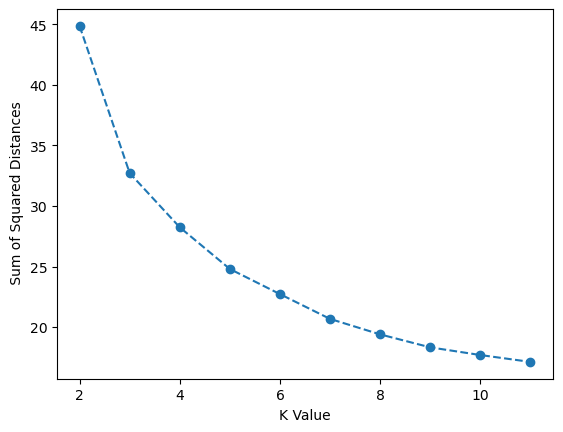

In [69]:
warnings.filterwarnings("ignore", category=UserWarning)
ssd = []

for k in range(2,12):
    
    model = KMeans(n_clusters=k,random_state=5508)
    
    
    model.fit(embedding_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
plt.plot(range(2,12),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

When applying the elbow method to determine the optimal value of K, it is challenging to identify clear elbow points in the sum of squared distances (SSD) plot. In such cases, an alternative technique like silhouette analysis can be employed to make a more informed decision about the appropriate number of clusters.

C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

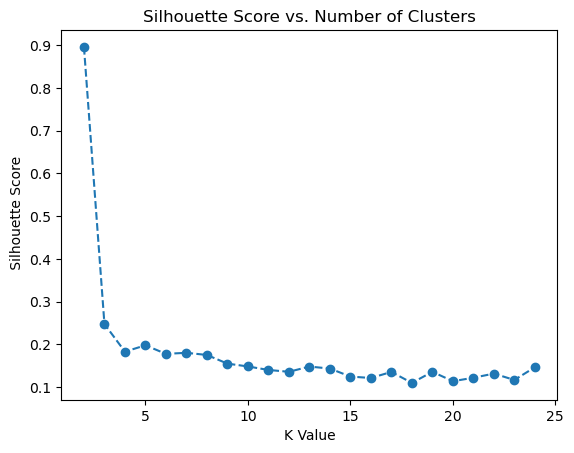

In [74]:
# Ignore the warning
warnings.filterwarnings("ignore", category=UserWarning)
# define range of K values
k_range = range(2, 25)

# empty list to store silhouette scores for each K
silhouette_scores = []

# loop over K values
for k in k_range:
    # fit K-means model
    kmeans = KMeans(n_clusters=k, random_state=5508).fit(embedding_df)
    # compute silhouette score
    score = silhouette_score(embedding_df, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(score)
plt.plot(k_range,silhouette_scores,'o--')
plt.xlabel("K Value")
plt.ylabel(" Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

So far we are considering 415 tenders , open individually looking at the tenders, i feel like more than 10 clusters should be performed.

When the K value increases K value doesn't change much which indicates that additional clusters beyond K=3 do not improve the clustering quality significantly. The clusters may continue to have similar patterns of separation and cohesion, leading to similar average silhouette widths.

By looking at this it seems that k= 2 could be an optimal value, let's look at the silhouette diagram and see how individual clusters performs for each K value.

C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

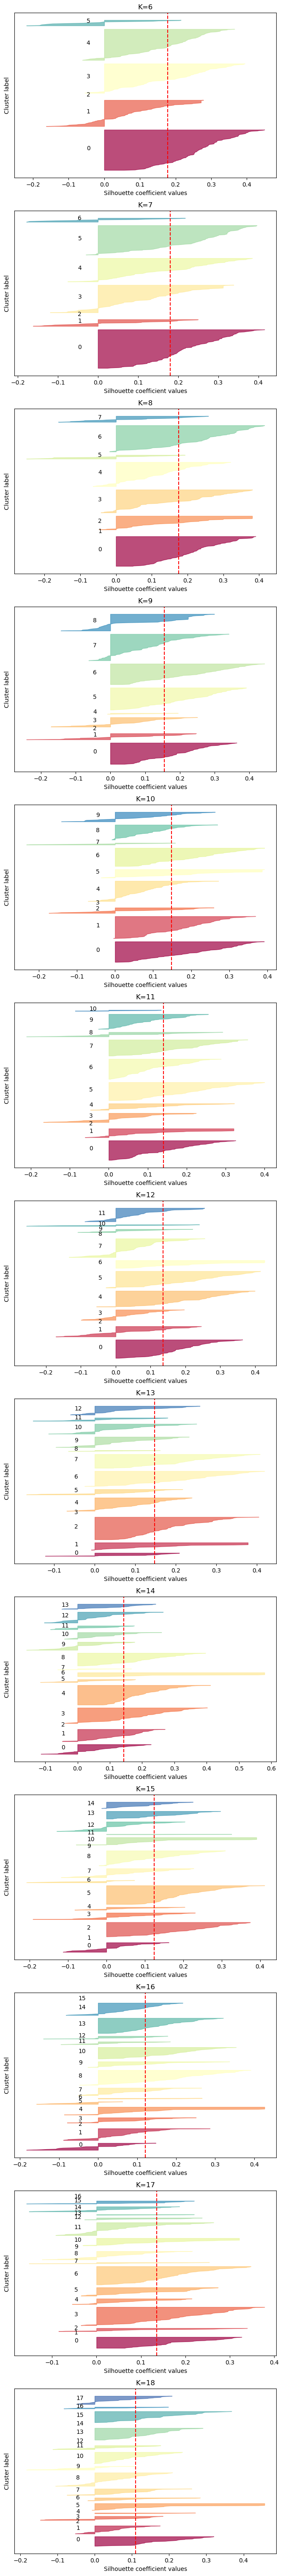

In [80]:
#Using silhouette analysis to find optimal K value

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Set random state
np.random.seed(5508)

# Define the range of K values
K_values = range(6, 19)

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Create a subplot for each K value
fig, axs = plt.subplots(len(K_values), 1, figsize=(8, 6 * len(K_values)))

# Iterate over the range of K values
for i, K in enumerate(K_values):
    # Fit the K-means model
    kmeans = KMeans(n_clusters=K, random_state=5508)
    kmeans.fit(embedding_df)

    # Obtain the cluster labels
    labels = kmeans.labels_

    # Compute the silhouette score
    silhouette_avg = silhouette_score(embedding_df, labels)
    silhouette_scores.append(silhouette_avg)

    # Plot the silhouette diagram
    ax = axs[i]
    y_lower = 10

    for j in range(K):
        # Collect silhouette scores for samples in the current cluster
        cluster_silhouette_scores = silhouette_samples(embedding_df, labels)[labels == j]
        cluster_silhouette_scores.sort()

        size_cluster_j = cluster_silhouette_scores.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.get_cmap("Spectral")(j / K)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the cluster with its silhouette score
        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_title(f"K={K}")


In [82]:
# Perform DBSCAN clustering
kmeans = KMeans(n_clusters=10, random_state=5508)
cluster_labels = kmeans.fit_predict(embedding_df)

# Add the cluster labels to the original DataFrame
df['Cluster_Label'] = cluster_labels

# Save the updated DataFrame to a new Excel file
updated_file_path = 'updated_excel_file.xlsx'
df.to_excel(updated_file_path, index=False)

# Print the cluster labels
print("Cluster labels:")
print(cluster_labels)

C:\Users\skena\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels:
[8 1 6 1 0 0 9 6 6 1 1 5 6 1 6 1 6 0 0 9 1 0 2 4 9 6 6 1 4 0 8 2 4 8 7 1 1
 0 4 0 4 6 6 1 0 8 8 0 0 9 8 1 9 1 7 8 0 8 8 8 9 9 6 0 8 4 4 6 6 1 9 8 8 0
 6 8 8 8 8 8 1 4 9 0 0 9 1 4 1 1 5 1 1 8 4 9 4 0 4 0 4 9 0 4 1 1 1 4 9 8 8
 6 9 8 1 6 6 1 7 6 7 5 5 1 9 5 5 5 5 5 5 4 5 5 5 8 0 9 4 0 1 1 6 6 4 4 5 2
 5 6 5 5 0 0 8 5 4 1 1 6 0 0 0 5 6 1 3 1 0 0 1 1 1 1 5 7 4 5 0 8 6 5 2 6 0
 9 9 1 9 9 6 6 0 0 0 4 0 1 0 6 2 0 1 9 4 8 0 2 2 4 6 9 9 6 4 9 1 0 0 6 1 8
 6 6 1 0 0 9 8 8 4 0 8 8 4 4 4 2 4 8 0 8 4 4 0 8 8 0 5 4 4 0 4 4 2 5 7 1 4
 2 2 9 5 0 1 1 1 0 9 4 4 8 6 0 4 0 1 4 8 8 1 6 4 6 0 4 4 5 0 0 6 4 0 1 1 0
 4 6 0 4 6 6 1 9 1 8 1 0 1 6 2 2 2 4 2 0 8 8 0 9 7 6 6 4 0 1 1 1 1 1 8 0 1
 1 9 4 4 1 1 4 4 8 6 1 4 4 1 1 4 1 0 6 6 6 1 1 0 2 6 0 0 0 4 5 5 4 0 6 5 2
 6 9 9 6 4 8 8 1 1 1 8 2 8 6 6 6 8 4 4 1 6 6 4 0 9 6 8 1 6 4 6 4 4 2 6 6 4
 0 8 8 1 0 6 4 4 4]


In [83]:
import pandas as pd

# Load the original Excel file into a DataFrame
file_path = 'updated_excel_file.xlsx'
df = pd.read_excel(file_path)

# Specify the columns you want to keep (replace 'Column1' and 'Column2' with the actual column names)
columns_to_keep = ['Reference Number', 'Client Agency','Developing Agency Parent','Contract Title','Description','UNSPSC Title','Cluster_Label']

# Create a new DataFrame with only the specified columns
new_df = df[columns_to_keep]

# Save the new DataFrame to a new Excel file
new_file_path = 'cluster_file.xlsx'
new_df.to_excel(new_file_path, index=False)
